# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [3]:
import pandas as pd
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [16]:
sales.query("sales > 10")


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [17]:
sales.query("year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [18]:
sales.query("sales > 13 & year == 2018")

,employee,sales,year
0,Katrina,14,2018


In [19]:
sales.query("not (sales > 13 & year == 2018)")

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [20]:
sales.query("(sales/3) > 3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [30]:
sales.query("employee > 'J' ")

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 


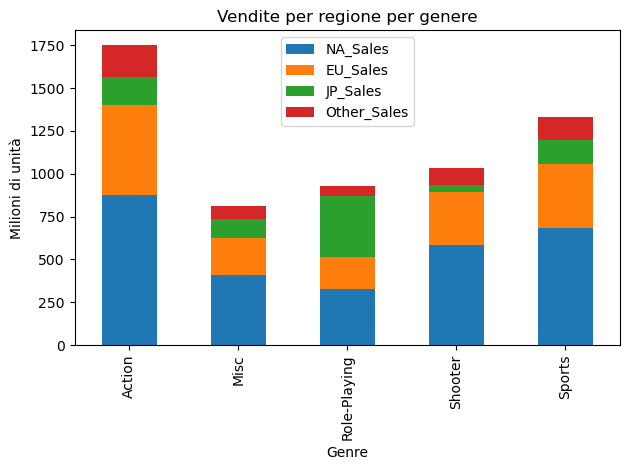


In [5]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
num_giochi = df['Name'].nunique()
num_giochi

11493

/tmp/ipykernel_8309/3212921611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genere.values, y=genere.index, palette="viridis")


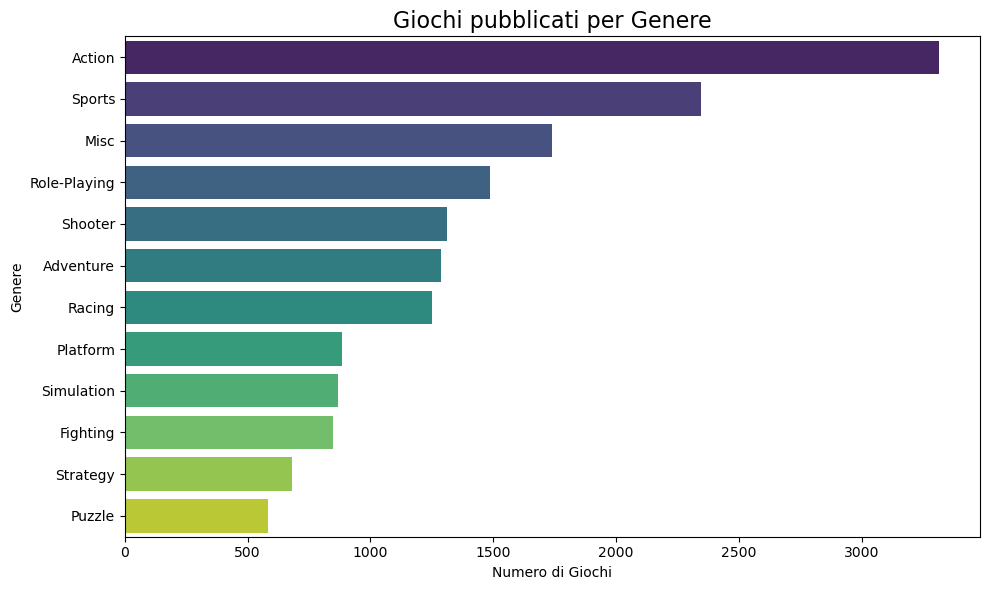

In [41]:
genere = df["Genre"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genere.values, y=genere.index, palette="viridis")
plt.title("Giochi pubblicati per Genere", fontsize=16)
plt.xlabel("Numero di Giochi")
plt.ylabel("Genere")
plt.tight_layout()
plt.show()

/tmp/ipykernel_8309/1183115873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype(int)


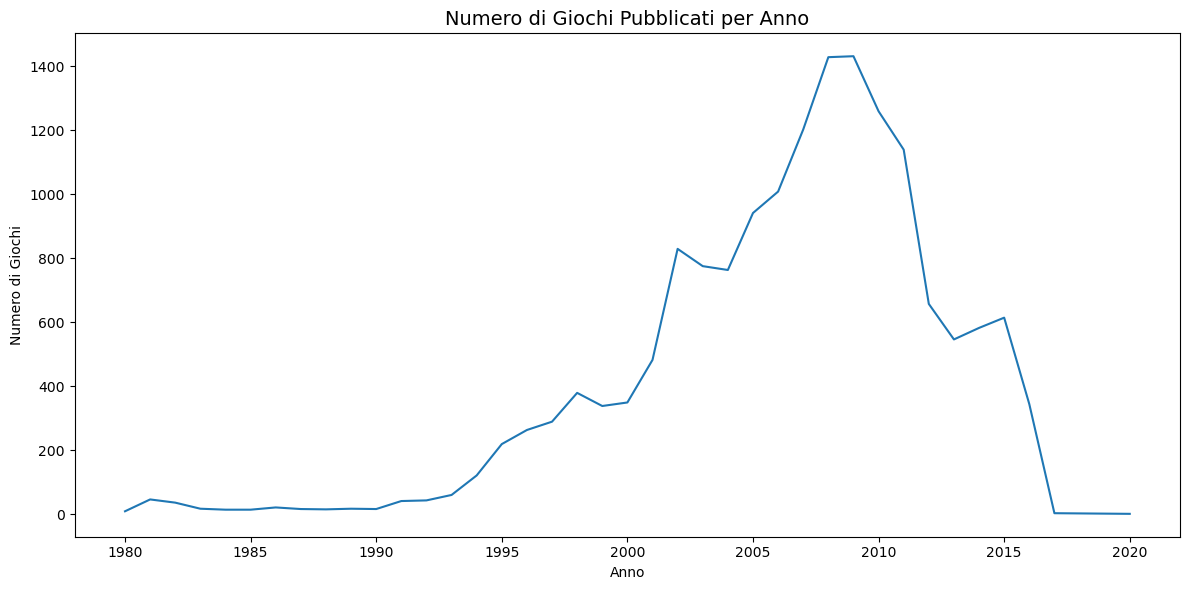

In [43]:
df_clean = df.dropna(subset=['Year'])
df_clean['Year'] = df_clean['Year'].astype(int)
giochi = df_clean['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=giochi.index, y=giochi.values)
plt.title("Numero di Giochi Pubblicati per Anno", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Numero di Giochi")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

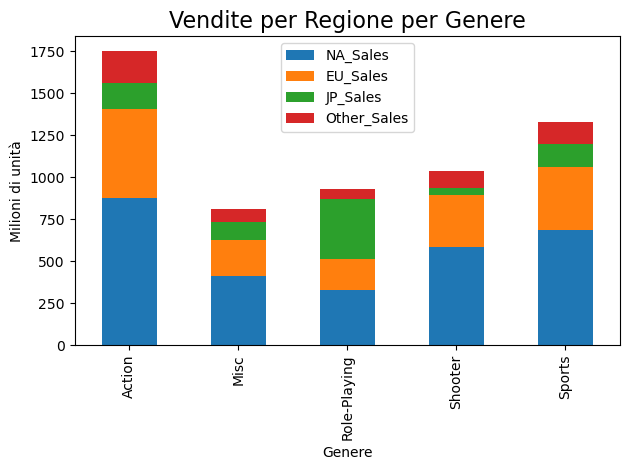

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

generi_migliori = df.groupby("Genre")["Name"].count().sort_values(ascending=False).head(5)
vendite_generi_migliori = df[df["Genre"].isin(generi_migliori.index)].groupby("Genre")[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].sum()
plt.figure(figsize=(10, 6))
vendite_generi_migliori.plot(stacked=True, kind="bar")
plt.title('Vendite per Regione per Genere', fontsize=16)
plt.ylabel('Milioni di unità')
plt.xlabel('Genere')
plt.tight_layout()
plt.show()
